In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import os
os.environ['PROJ_LIB'] = 'C:/Users/viole/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import shapefile

#%matplotlib nbagg
%matplotlib inline

In [21]:
data = pd.read_csv("pollution_us_2000_2016.csv/pollution_california_2000_2016.csv")
data.head()

,id,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,3516,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.556522,1.3,4,NaN
1,3517,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.572222,0.8,6,9.0
2,3518,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.556522,1.3,4,NaN
3,3519,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.572222,0.8,6,9.0
4,3520,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/2/2000,16.043478,...,9,27,1.000000,2.0,5,3.0,0.578261,1.1,21,NaN


In [22]:
data = data.dropna(axis='rows')  # Delete rows with null values
data['Date Local'] = pd.to_datetime(data['Date Local'],format='%m/%d/%Y')  # Set the format of date 
data = data.groupby(['County','Date Local'], as_index=False).mean()  # Calculate mean for depulicated entries
data.head()

,County,Date Local,id,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Alameda,2001-12-05,3631.0,6.0,1.0,10.0,32.608696,38.0,15.0,36.0,...,22.0,6.0,1.333333,3.0,11.0,4.0,1.066667,1.2,18.0,14.0
1,Alameda,2001-12-06,3635.0,6.0,1.0,10.0,30.625000,62.0,23.0,60.0,...,0.0,6.0,2.416667,8.0,16.0,11.0,0.266667,0.8,0.0,9.0
2,Alameda,2001-12-07,3639.0,6.0,1.0,10.0,20.416667,32.0,22.0,30.0,...,11.0,18.0,1.625000,5.0,10.0,7.0,0.575000,1.2,8.0,14.0
3,Alameda,2001-12-08,3643.0,6.0,1.0,10.0,27.125000,33.0,16.0,31.0,...,23.0,29.0,1.916667,4.0,4.0,6.0,1.145833,1.9,10.0,22.0
4,Alameda,2001-12-09,3647.0,6.0,1.0,10.0,16.625000,36.0,17.0,34.0,...,0.0,28.0,2.041667,4.0,7.0,6.0,0.479167,1.8,22.0,20.0


In the graph below, the number of records for each county in California is shown. 
<br>As you can see, the air pollution information for eighteen county in California is available in the dataset.

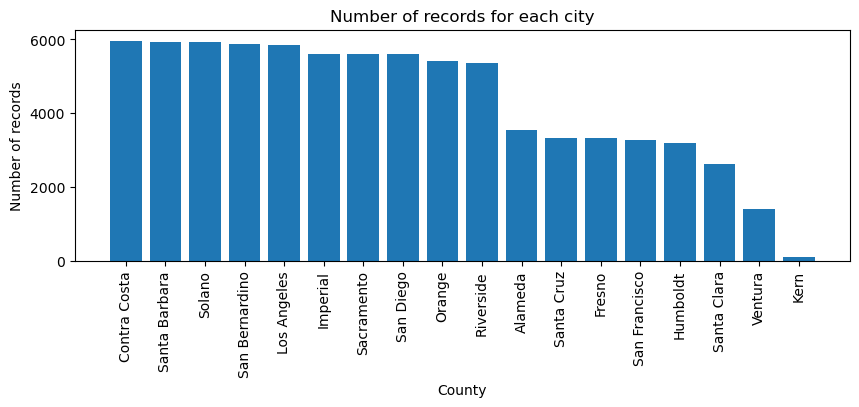

In [24]:
CountyRecords = pd.DataFrame(data['County'].value_counts().sort_values(ascending = False))
CountyRecords.reset_index(inplace=True)
CountyRecords.iloc[:, 0]
plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(figsize=(10, 3))
plt.bar(cityRecords.iloc[:, 0], cityRecords.iloc[:, 1])
plt.title("Number of records for each county")
plt.xlabel("County")
plt.ylabel("Number of records")
plt.xticks(rotation=90)
#plt.style.available
plt.style.use('fivethirtyeight') 
plt.show()

The extractCountyData function below, extracts the data for selected counties and group them by date. 
<br>Then we take the maximum amount of each pollutant for each month of each year.
<br>

In [26]:
def extractCountyData(county):
    countyData = pd.DataFrame()
    countyData = data[(data.County == county)].copy()
    countyData = countyData[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
    countyData = countyData.mean()
    countyData = countyData.resample('M').max() # Maximum value of the month for each pollutant. Can also be replaced with meanor mode
    #countyData.reset_index(inplace=True)
    return countyData

dataLosAngeles = extractCountyData('Los Angeles')
dataSanFrancisco = extractCountyData('San Francisco')
dataSacramento = extractCountyData('Sacramento')
dataSanBernardino = extractCountyData('San Bernardino')
dataCosta = extractCountyData('Contra Costa')
dataSantaBarbara = extractCountyData('Santa Barbara')
dataSolano = extractCountyData('Solano')
dataImperial = extractCountyData('Imperial')
dataSanDiego = extractCountyData('San Diego')
dataOrange = extractCountyData('Orange')
dataRiverside = extractCountyData('Riverside')
dataAlameda = extractCountyData('Alameda')
dataSantaCruz = extractCountyData('Santa Cruz')
dataFresno = extractCountyData('Fresno')
dataHumboldt = extractCountyData('Humboldt')
dataSantaClara = extractCountyData('Santa Clara')
dataVentura = extractCountyData('Ventura')
dataKern = extractCountyData('Kern')
    
dataLosAngeles.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-31,104.333333,32.000000,32.666667,60.333333
2000-02-29,82.333333,31.666667,14.333333,43.333333
2000-03-31,93.000000,62.000000,15.500000,31.250000
2000-04-30,83.000000,82.000000,14.750000,23.250000
2000-05-31,73.000000,133.000000,47.750000,19.750000


<IPython.core.display.Javascript object>


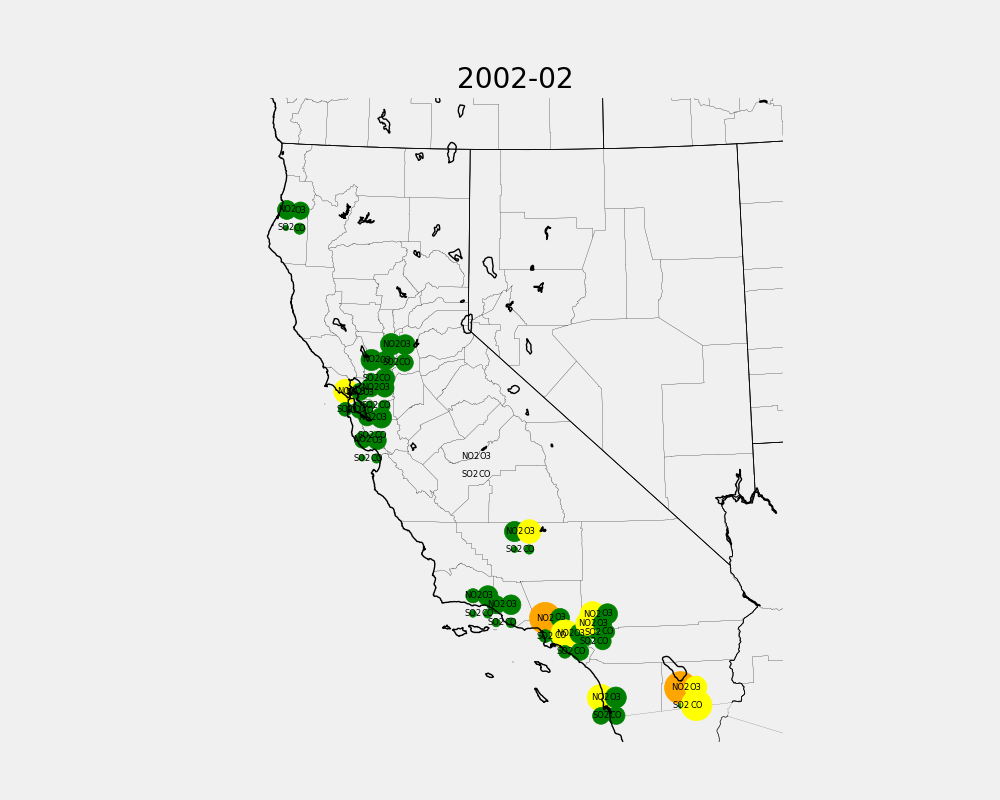

In [30]:
citiesLatLong = pd.read_csv("cal_cities_lat_long.csv")
citiesLatLong.set_index('Name', inplace=True)

%matplotlib nbagg
mpl.rcParams['figure.figsize'] = (10,8)
fig = plt.figure()

map = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
map.drawcoastlines()
map.drawstates()
map.drawcounties(color = 'black')

ax = plt.gca()

# Initialize 
size = 5
ratio = 0.15
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
plt.title(dataLosAngeles.index[0].strftime('%Y-%m'))


def scatterCounty(county, countyData):
    # Initialize 
    sizesCounty = countyData.iloc[0]*size
    colorsCounty = countyData.iloc[0]

    tempX = citiesLatLong[(citiesLatLong.index == county)].Latitude.values
    tempY = citiesLatLong[(citiesLatLong.index == county)].Longitude.values
#     print(tempX)
#     print(tempY)

    x1,y1=map(tempY - ratio,tempX + ratio)
    x2,y2=map(tempY + ratio,tempX + ratio)
    x3,y3=map(tempY - ratio,tempX - ratio)
    x4,y4=map(tempY + ratio,tempX - ratio)
    scatter = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4])
                           , s = sizesCounty, c = colorsCounty, cmap = cmap, norm = norm)
#     scatter = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4])
#                            , s = sizesCounty, c = colorsCounty, cmap = cmap, norm = norm, 
#                           alpha = 0.8, edgecolors = 'face', zorder = 3)
    x=[x1,x2,x3,x4]
    y=[y1,y2,y3,y4]
    labels=['NO2','O3','SO2','CO']
    for i, txt in enumerate(labels):
        ax.annotate(labels[i],(x[i],y[i]),size=6,va='center',ha='center')
    return scatter

scatter1 = scatterCounty('Los Angeles', dataLosAngeles)
scatter2 = scatterCounty('San Francisco', dataSanFrancisco)
scatter3 = scatterCounty('Sacramento', dataSacramento)
scatter4 = scatterCounty('San Bernardino', dataSanBernardino)
scatter5 = scatterCounty('Contra Costa', dataCosta)
scatter6 = scatterCounty('Santa Barbara', dataSantaBarbara)
scatter7 = scatterCounty('Solano', dataSolano)
scatter8 = scatterCounty('Imperial', dataImperial)
scatter9 = scatterCounty('San Diego', dataSanDiego)
scatter10 = scatterCounty('Orange', dataOrange)
scatter11 = scatterCounty('Riverside', dataRiverside)
scatter12 = scatterCounty('Alameda', dataAlameda)
scatter13 = scatterCounty('Santa Cruz', dataSantaCruz)
scatter14 = scatterCounty('Fresno', dataFresno)
scatter15 = scatterCounty('Humboldt', dataHumboldt)
scatter16 = scatterCounty('Santa Clara', dataSantaClara)
scatter17 = scatterCounty('Ventura', dataVentura)
scatter18 = scatterCounty('Kern', dataKern)

# Update function for animation
def update(i):
    print(i)
    plt.title(dataLosAngeles.index[i].strftime('%Y-%m'))
    
    scatter1.set_sizes(dataLosAngeles.iloc[i]*size)
    scatter1.set_color(m.to_rgba(dataLosAngeles.iloc[i]))
    
    scatter2.set_sizes(dataSanFrancisco.iloc[i]*size)
    scatter2.set_color(m.to_rgba(dataSanFrancisco.iloc[i]))
    
    scatter3.set_sizes(dataSacramento.iloc[i]*size)
    scatter3.set_color(m.to_rgba(dataSacramento.iloc[i]))
    
    scatter4.set_sizes(dataSanBernardino.iloc[i]*size)
    scatter4.set_color(m.to_rgba(dataSanBernardino.iloc[i]))
    
    scatter5.set_sizes(dataCosta.iloc[i]*size)
    scatter5.set_color(m.to_rgba(dataCosta.iloc[i]))
    
    scatter6.set_sizes(dataSantaBarbara.iloc[i]*size)
    scatter6.set_color(m.to_rgba(dataSantaBarbara.iloc[i]))
    
    scatter7.set_sizes(dataSolano.iloc[i]*size)
    scatter7.set_color(m.to_rgba(dataSolano.iloc[i]))
    
    scatter8.set_sizes(dataImperial.iloc[i]*size)
    scatter8.set_color(m.to_rgba(dataImperial.iloc[i]))
    
    scatter9.set_sizes(dataSanDiego.iloc[i]*size)
    scatter9.set_color(m.to_rgba(dataSanDiego.iloc[i]))
    
    scatter10.set_sizes(dataOrange.iloc[i]*size)
    scatter10.set_color(m.to_rgba(dataOrange.iloc[i]))
    
    scatter11.set_sizes(dataRiverside.iloc[i]*size)
    scatter11.set_color(m.to_rgba(dataRiverside.iloc[i]))
    
    scatter12.set_sizes(dataAlameda.iloc[i]*size)
    scatter12.set_color(m.to_rgba(dataAlameda.iloc[i]))
    
    scatter13.set_sizes(dataSantaCruz.iloc[i]*size)
    scatter13.set_color(m.to_rgba(dataSantaCruz.iloc[i]))
    
    scatter14.set_sizes(dataFresno.iloc[i]*size)
    scatter14.set_color(m.to_rgba(dataFresno.iloc[i]))
    
    scatter15.set_sizes(dataHumboldt.iloc[i]*size)
    scatter15.set_color(m.to_rgba(dataHumboldt.iloc[i]))

    scatter16.set_sizes(dataSantaClara.iloc[i]*size)
    scatter16.set_color(m.to_rgba(dataSantaClara.iloc[i]))
    
    scatter17.set_sizes(dataVentura.iloc[i]*size)
    scatter17.set_color(m.to_rgba(dataVentura.iloc[i]))
    
    scatter18.set_sizes(dataKern.iloc[i]*size)
    scatter18.set_color(m.to_rgba(dataKern.iloc[i]))

anim = FuncAnimation(plt.gcf(),update) #,interval=100,blit=True,repeat=False,frames=196)
#anim.save('MAX_AQI.gif', writer='imagemagick')
#os.system("ffmpeg -i C:\\my_path\\animation.mp4 C:\\my_path\\animation.gif")
anim

In [ ]:
pol = 0 # NO2 AQI

mpl.rcParams['figure.figsize'] = (10,8)
fig = plt.figure()
map = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
map.drawstates()
map.drawcounties(color = 'black')

# Collect the county names from the shapefile attributes
county_names = []
for shape_dict in map.counties_info:
        county_names.append(shape_dict['NAME'])
    
ax = plt.gca()

# Initialize 

cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.title('Maximum NO2 AQI in ' + dataLosAngeles.index[0].strftime('%Y-%m'))


def scatterCounty(county, countyData):
    # Initialize 
    color = m.to_rgba(countyData.iloc[0,pol])
    #print(countyData.iloc[0,0])
    #print(color)
    indices = [i for i, x in enumerate(county_names) if x == county]
    #for index in indices:
    seg = map.counties[max(indices)]
    if (county == 'Orange'):
        seg = map.counties[min(indices)]
    poly = Polygon(seg, facecolor=color,edgecolor='black')
    ax.add_patch(poly)
    return poly

p1 = scatterCounty('Los Angeles', dataLosAngeles)
p2 = scatterCounty('San Francisco', dataSanFrancisco)
p3 = scatterCounty('Sacramento', dataSacramento)
p4 = scatterCounty('San Bernardino', dataSanBernardino)
p5 = scatterCounty('Contra Costa', dataCosta)
p6 = scatterCounty('Santa Barbara', dataSantaBarbara)
p7 = scatterCounty('Solano', dataSolano)
p8 = scatterCounty('Imperial', dataImperial)
p9 = scatterCounty('San Diego', dataSanDiego)
p10 = scatterCounty('Orange', dataOrange)
p11 = scatterCounty('Riverside', dataRiverside)
p12 = scatterCounty('Alameda', dataAlameda)
p13 = scatterCounty('Santa Cruz', dataSantaCruz)
p14 = scatterCounty('Fresno', dataFresno)
#p15 = scatterCounty('Humboldt', dataHumboldt)
p16 = scatterCounty('Santa Clara', dataSantaClara)
p17 = scatterCounty('Ventura', dataVentura)
p18 = scatterCounty('Kern', dataKern)

# Update function for animation
def update(i):
    #print(i)
    plt.title('Maximum NO2 AQI in ' + dataLosAngeles.index[i].strftime('%Y-%m'))
    
    p1.set_color(m.to_rgba(dataLosAngeles.iloc[i,pol]))
    p1.set_edgecolor('black')
    
    p2.set_color(m.to_rgba(dataSanFrancisco.iloc[i,pol]))
    p2.set_edgecolor('black')
    
    p3.set_color(m.to_rgba(dataSacramento.iloc[i,pol]))
    p3.set_edgecolor('black')
    
    p4.set_color(m.to_rgba(dataSanBernardino.iloc[i,pol]))
    p4.set_edgecolor('black')
    
    p5.set_color(m.to_rgba(dataCosta.iloc[i,pol])) 
    p5.set_edgecolor('black')
    
    p6.set_color(m.to_rgba(dataSantaBarbara.iloc[i,pol]))
    p6.set_edgecolor('black')
    
    p7.set_color(m.to_rgba(dataSolano.iloc[i,pol]))
    p7.set_edgecolor('black')
    
    p8.set_color(m.to_rgba(dataImperial.iloc[i,pol]))
    p8.set_edgecolor('black')
    
    p9.set_color(m.to_rgba(dataSanDiego.iloc[i,pol]))
    p9.set_edgecolor('black')
    
    p10.set_color(m.to_rgba(dataOrange.iloc[i,pol]))
    p10.set_edgecolor('black')
    
    p11.set_color(m.to_rgba(dataRiverside.iloc[i,pol]))
    p11.set_edgecolor('black')
    
    p12.set_color(m.to_rgba(dataAlameda.iloc[i,pol]))
    p12.set_edgecolor('black')
    
    p13.set_color(m.to_rgba(dataSantaCruz.iloc[i,pol]))
    p13.set_edgecolor('black')
    
    p14.set_color(m.to_rgba(dataFresno.iloc[i,pol]))
    p14.set_edgecolor('black')
    
#     p15.set_color(m.to_rgba(dataHumboldt.iloc[i,pol]))
#     p15.set_edgecolor('black')
    
    p16.set_color(m.to_rgba(dataSantaClara.iloc[i,pol]))
    p16.set_edgecolor('black')
    
    p17.set_color(m.to_rgba(dataVentura.iloc[i,pol]))
    p17.set_edgecolor('black')
    
    p18.set_color(m.to_rgba(dataKern.iloc[i,pol]))
    p18.set_edgecolor('black') 

anim = FuncAnimation(plt.gcf(),update)
anim